In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [4]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_chrombpnet_results/assembly/mm10/gene_scores_merged"
summary_path = os.path.join(data_dir, "summary.tsv")
data_path = os.path.join(data_dir, "data.tsv")



# Summary Visualizations

Here, I visualize some summary statistics for each cell type across tested mouse peaks

In [5]:
summary = pd.read_csv(summary_path, sep='\t', header=0)
summary


,label,fdr10,fdr25,npeaks
0,tr-dCM,0.659706,0.755768,5028
1,FB-CM,0.361286,0.494492,8896
2,pCM-2,0.000000,0.131506,6897
3,lEC,0.000000,0.160660,7936
4,Other-2,0.000000,0.068334,9439
5,pCM-1,0.000000,0.075331,5509
6,Other-1,0.163866,0.300551,7616
7,FB-1,0.000000,0.129086,11504
8,l-mCM,0.189299,0.395971,9382
9,EC-1,0.443693,0.641156,7095


## Proportion of significant peaks for each cell type

The proportion of significant peaks in each cell type, at an FDR threshold of 10% and 1%. It looks like this proportion varies substantially across cell types for both thresholds. 

This could indicate cell-type-specific effects, but we want to account for possible confounders.

<AxesSubplot: xlabel='fdr25', ylabel='label'>

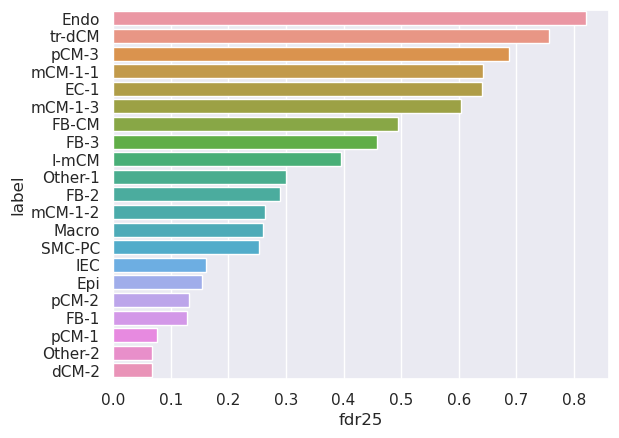

In [6]:
sns.barplot(data=summary, y="label", x="fdr25", order=summary.sort_values('fdr25', ascending=False).label)


<AxesSubplot: xlabel='fdr10', ylabel='label'>

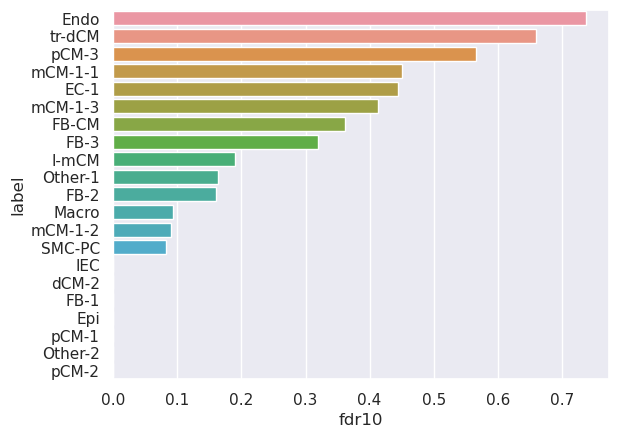

In [7]:
sns.barplot(data=summary, y="label", x="fdr10", order=summary.sort_values('fdr10', ascending=False).label)


# Per-Gene Visualizations

Now, I look into the distributions of several metrics across individual mouse genes.

In [8]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

,gene_name,gene_id,transcript_name,transcript_id,chrom,pos,tss_count,score_ss_0,score_ss_1,score_ss_2,score_ss_3,score_ss_4,score_ss_mean,score_xs_mean,u_stat_ss,u_stat_xs,-log10p,-log10q,Label
0,Sox17,ENSMUSG00000025902,Sox17-201,ENSMUST00000027035,chr1,4496412,3.295837,0.833711,1.158221,1.438218,1.053126,1.238659,2.693981,1.144387,25.0,0.0,2.100371,1.776828,tr-dCM
1,Bpi,ENSMUSG00000052922,Bpi-202,ENSMUST00000109499,chr2,158258093,2.772589,1.856091,2.197363,2.464674,1.960208,2.233235,3.570102,2.142314,0.0,25.0,2.100371,1.776828,tr-dCM
2,Nol4l,ENSMUSG00000061411,Nol4l-203,ENSMUST00000129385,chr2,153492516,4.700480,2.531479,2.865571,3.151642,2.649036,2.907207,4.246467,2.820987,0.0,25.0,2.100371,1.776828,tr-dCM
3,4930404H24Rik,ENSMUSG00000079001,4930404H24Rik-201,ENSMUST00000109783,chr2,153492789,4.836282,2.530502,2.864668,3.150763,2.648102,2.906231,4.245608,2.820053,0.0,25.0,2.100371,1.776828,tr-dCM
4,Bpifb1,ENSMUSG00000027485,Bpifb1-202,ENSMUST00000081816,chr2,154190817,3.295837,1.956020,2.287343,2.564409,2.074618,2.319044,3.691068,2.240287,0.0,25.0,2.100371,1.776828,tr-dCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152147,Sp8,ENSMUSG00000048562,Sp8-201,ENSMUST00000063918,chr12,118846328,3.583519,3.837701,3.976836,3.679016,4.147482,3.878641,3.980324,3.903935,12.0,13.0,-0.000000,-0.000000,mCM-1-2
152148,Ttyh1,ENSMUSG00000030428,Ttyh1-205,ENSMUST00000128317,chr7,4130618,4.219508,5.622398,5.374652,5.276338,5.113223,5.517946,5.558842,5.380911,12.0,13.0,-0.000000,-0.000000,mCM-1-2
152149,Ube2s,ENSMUSG00000060860,Ube2s-203,ENSMUST00000205885,chr7,4812123,6.270988,5.615120,5.550592,5.291232,5.180198,5.788590,5.634413,5.485146,12.0,13.0,-0.000000,-0.000000,mCM-1-2
152150,Zfp583,ENSMUSG00000030443,Zfp583-202,ENSMUST00000108560,chr7,6330433,4.836282,5.031328,5.003956,4.652433,4.653918,5.131341,5.021550,4.894595,12.0,13.0,-0.000000,-0.000000,mCM-1-2


## Mouse vs. GP scores

Next, we look at the mean scores of the mouse and GP models on the mouse genes.  

The x axis is the mean predicted total ABC score as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted  total ABC score as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for some cell types, the slope is significantly different than 1 or even non-linear. I account for this when calculating significance by quantile-normalizing the predicted counts from each model. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

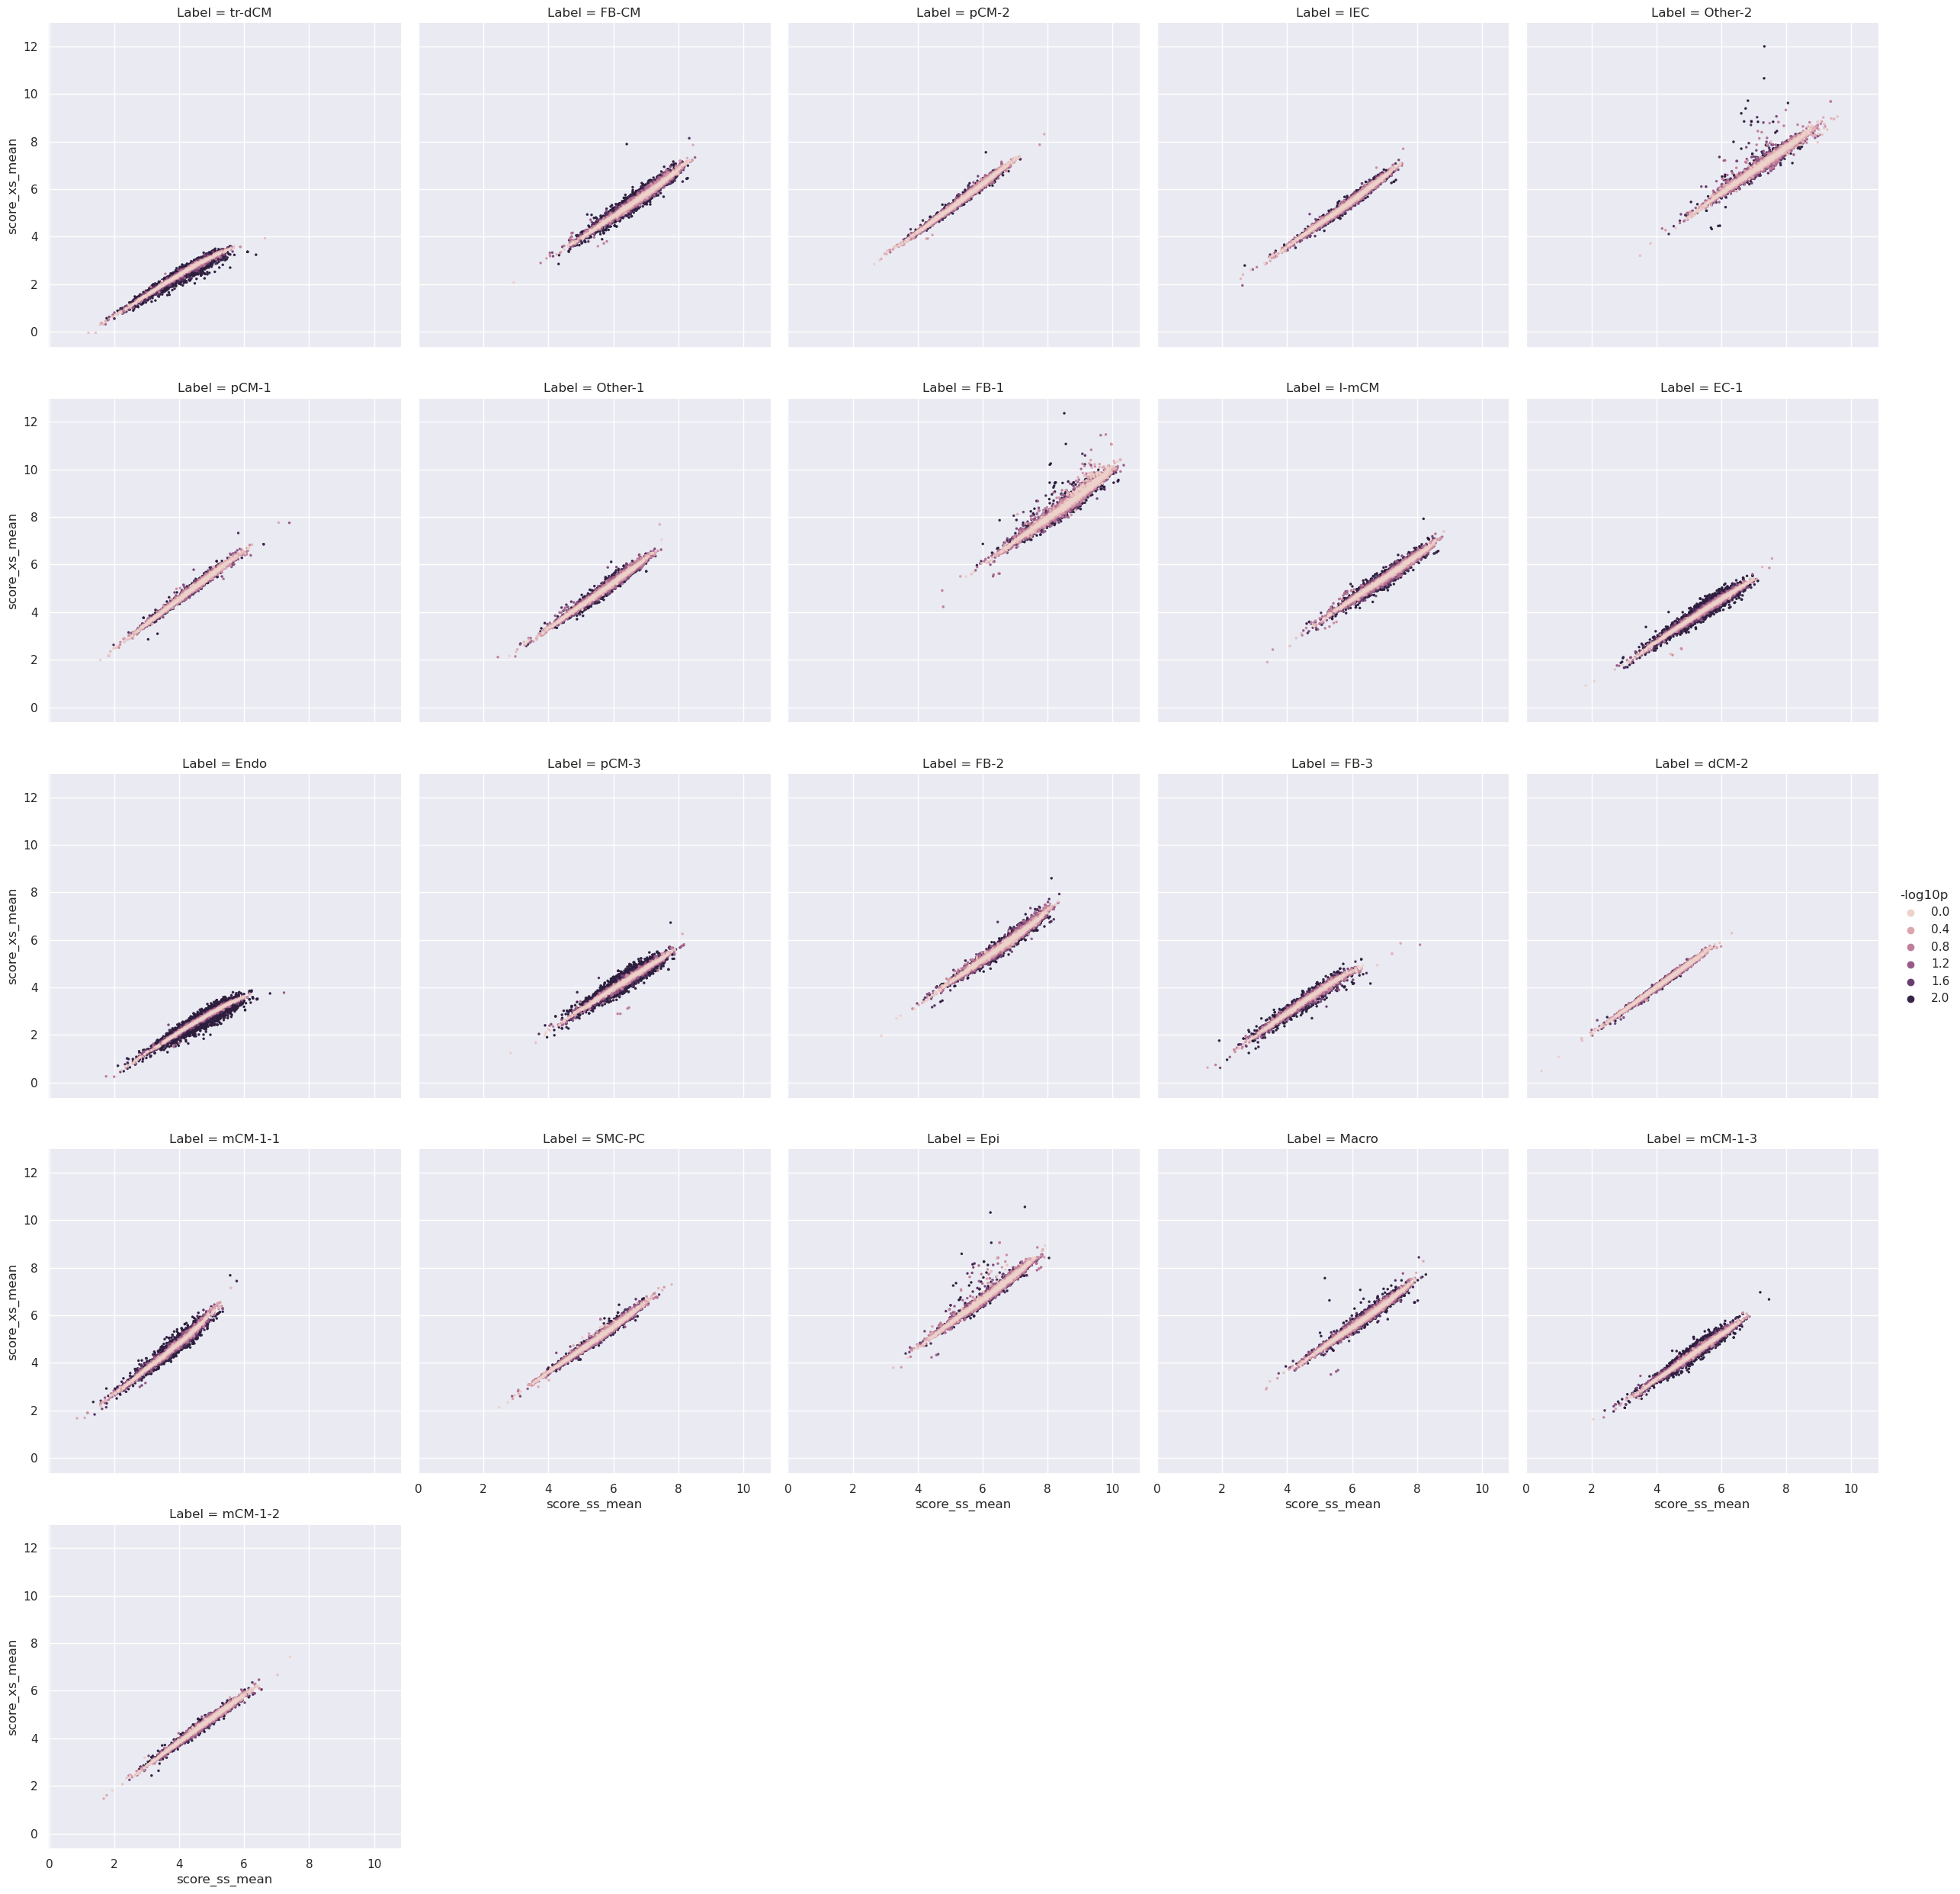

In [9]:
sns.relplot(data=data, x="score_ss_mean", y="score_xs_mean", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. predicted scores

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the scores as predicted by the fold 0 mouse model. The y axis is the scores as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

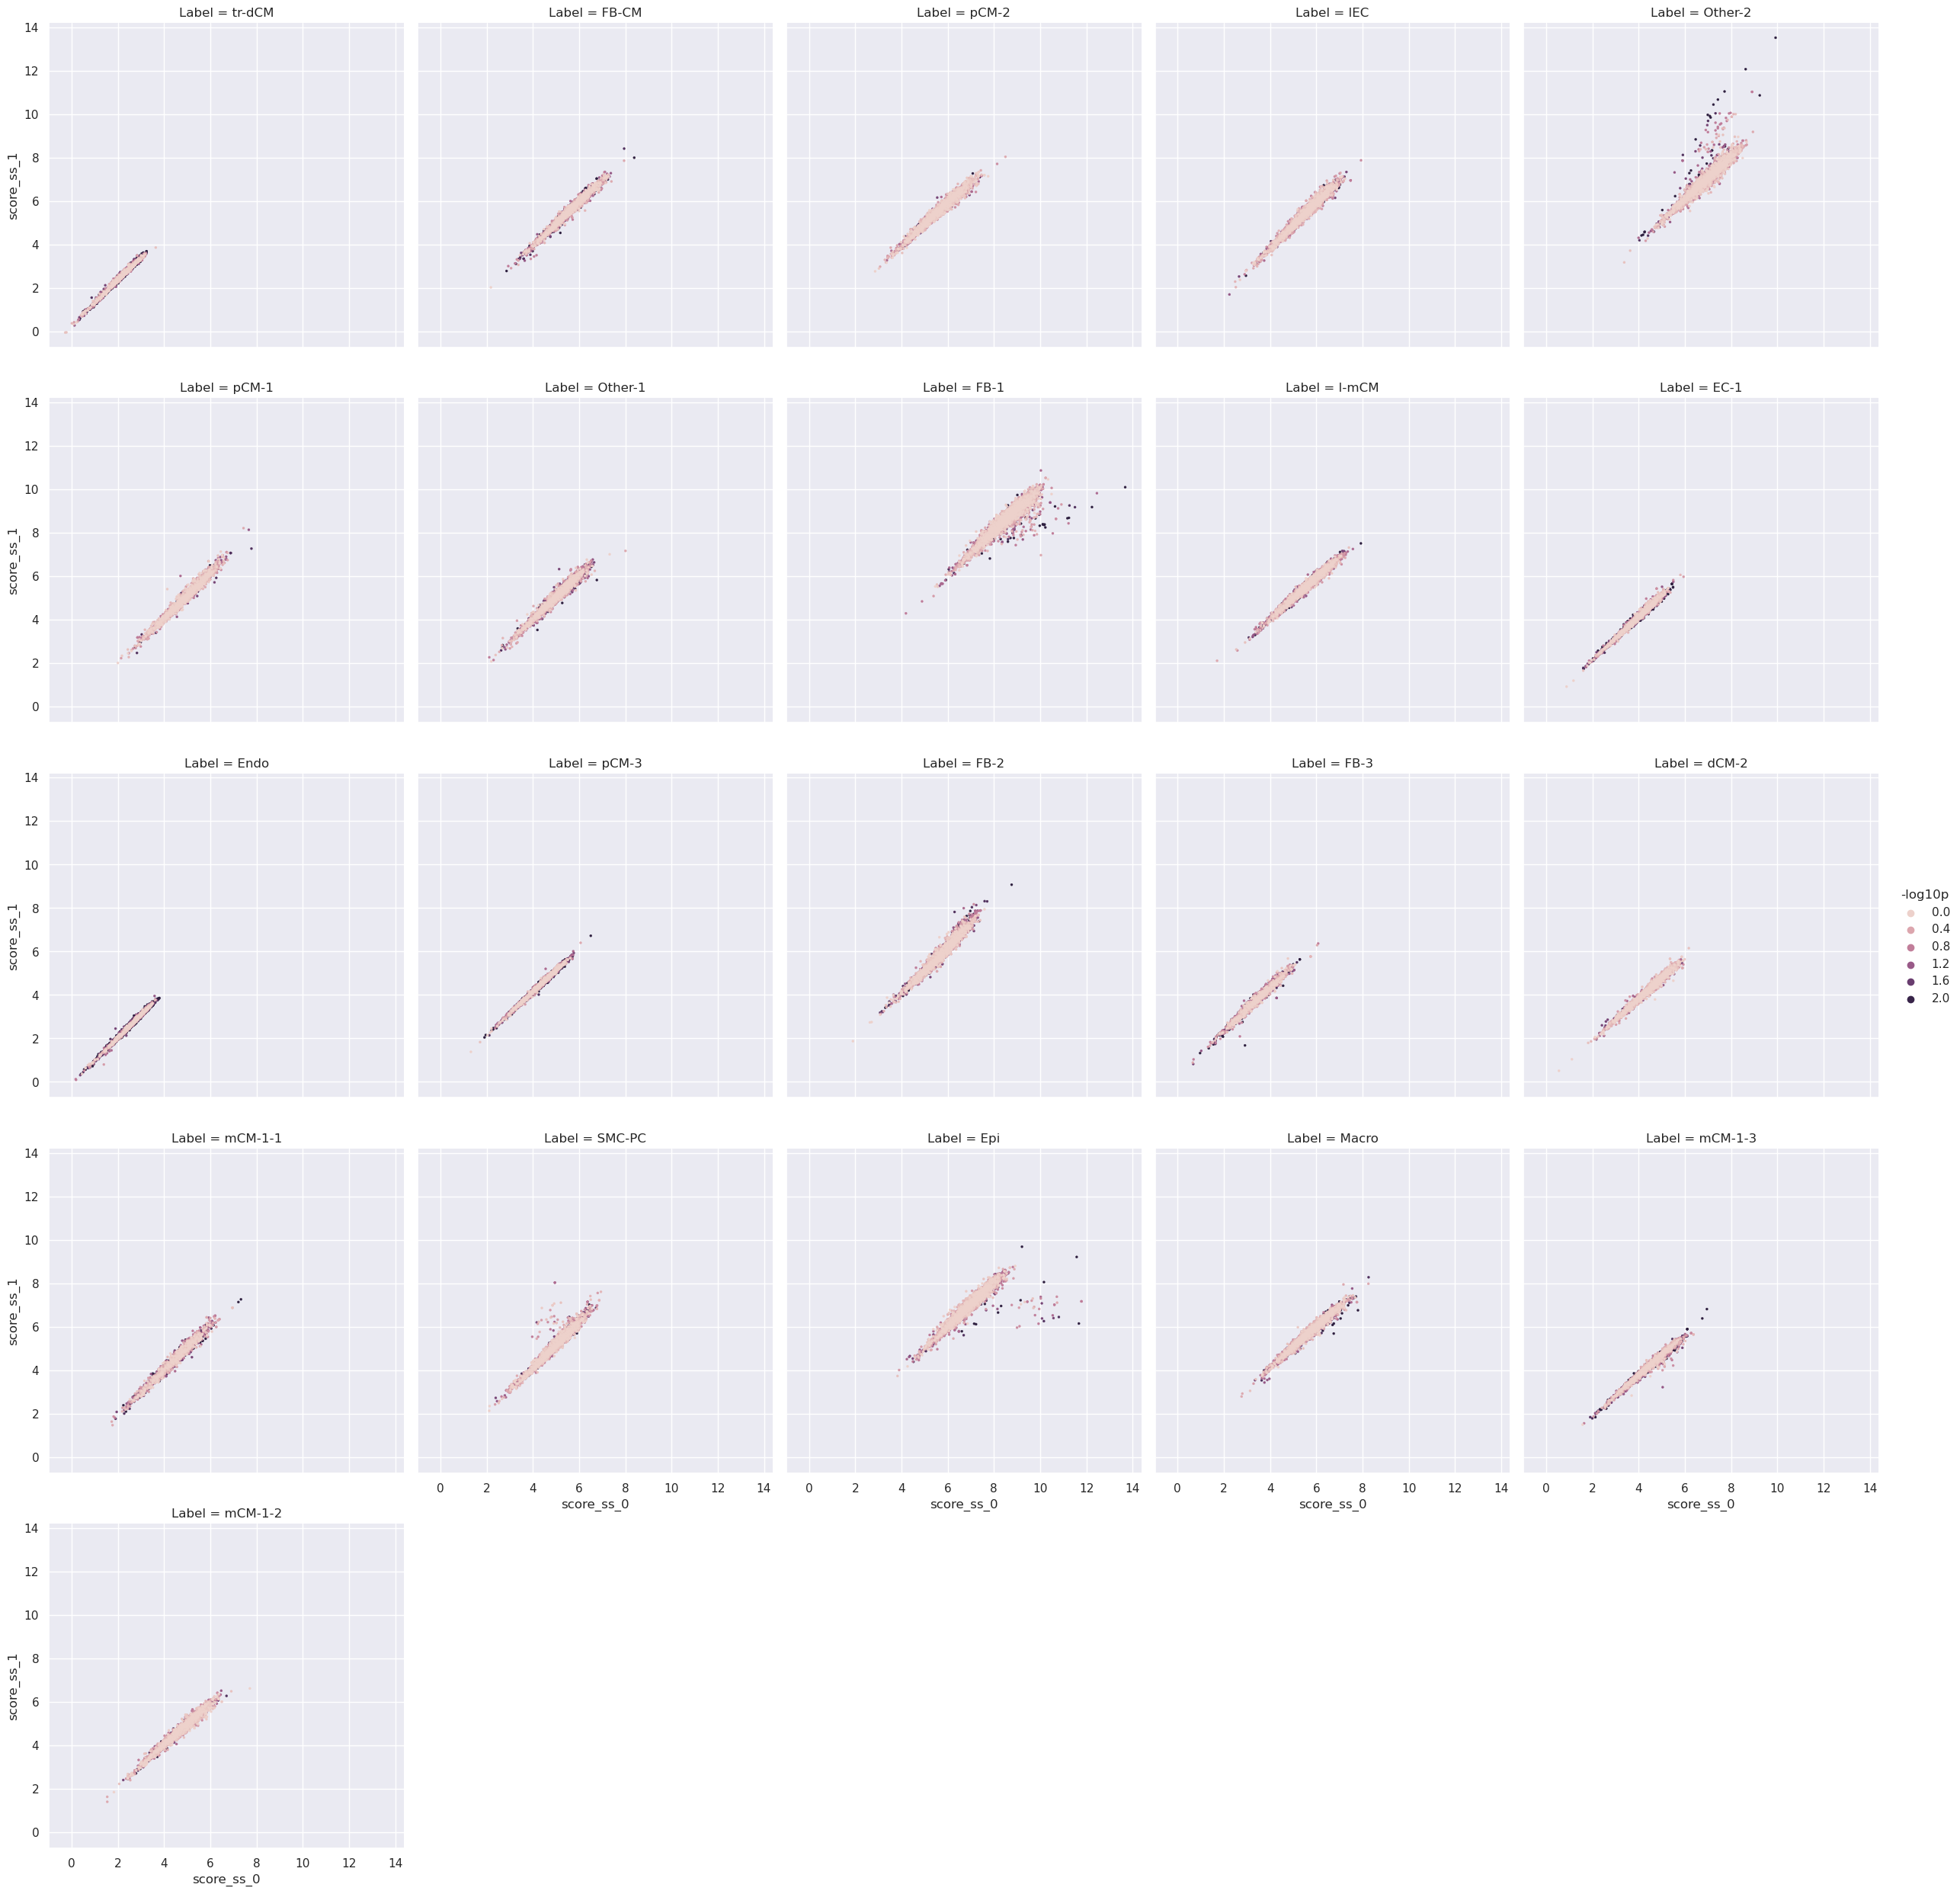

In [10]:
sns.relplot(data=data, x="score_ss_0", y="score_ss_1", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted scores

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the scores as predicted by the fold 0 mouse model. The y axis is the scores as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.


In [11]:
sns.relplot(data=data, x="score_ss_0", y="score_xs_0", hue="-log10p", col="Label", col_wrap=5, s=5, edgecolor=None)


ValueError: Could not interpret value `score_xs_0` for parameter `y`